In [1]:
import collections as ct
import graphviz as gv

In [2]:
# dicionários a serem usados para cidades

cities = {
    'Seattle': 0,
    'Newport': 1,
    'San Francisco': 2,
    'USC': 3,
    'Boise': 4,
    'Salt Lake': 5,
    'Las Vegas': 6,
    'Tucson': 7,
    'Casper': 8,
    'Denver': 9,
    'Albuquerque': 10,
    'El Paso': 11,
    'Pierre': 12,
    'Lincoln': 13,
    'Amarillo': 14,
    'San Antonio': 15,
    'Minneapolis': 16,
    'Kansas City': 17,
    'Ft. Smith': 18,
    'Houston': 19,
    'Chicago': 20,
    'St. Louis': 21,
    'Nashville': 22,
    'New Orleans': 23,
    'Pittsburg': 24,
    'Roanoke': 25,
    'Charlotte': 26,
    'Tallahassee': 27,
    'MIT': 28,
    'Washington': 29,
    'Daytona Beach': 30,
    'Wilmington': 31
}


inv_cities = {
    0:'Seattle',
    1:'Newport',
    2:'San Francisco',
    3:'USC',
    4:'Boise',
    5:'Salt Lake',
    6:'Las Vegas',
    7:'Tucson',
    8:'Casper',
    9:'Denver',
    10:'Albuquerque',
    11:'El Paso',
    12:'Pierre',
    13:'Lincoln',
    14:'Amarillo',
    15:'San Antonio',
    16:'Minneapolis',
    17:'Kansas City',
    18:'Ft. Smith',
    19:'Houston',
    20:'Chicago',
    21:'St. Louis',
    22:'Nashville',
    23:'New Orleans',
    24:'Pittsburg',
    25:'Roanoke',
    26:'Charlotte',
    27:'Tallahassee',
    28:'MIT',
    29:'Washington',
    30:'Daytona Beach',
    31:'Wilmington'
}

# Algoritmo de menor distância

In [3]:
INF=999999999999 # valor arbitrário para infinito

def shortest_dist(graph, final_node):
    dist=[0]*len(graph) # setando vetor de distância
    for u in reversed(sorted(graph.keys())):
        dist[u]=INF # distância infinita caso não conhecida
        for weight, node in graph[u]:
            print(u, '--', node, '=', weight)
            dist[u]=min(dist[u], weight+dist[node]) # pegamos a menor distância dentre a menor conhecida
                                                    # e a nova explorada

    return dist[0] # retornamos menor distância do início 

# Implementando lista de adjagência

In [4]:
graph = ct.defaultdict(list)

# implementamos a lista de adjacência por meio de dicio´narios
# para cada entrada temos suas conexões, segundo valor é qual ele se conecta e primeiro o peso dessa conexão
graph[cities['Seattle']] = [(494, cities['Boise'])]
graph[cities['Newport']] = [(561, cities['Boise'])]
graph[cities['San Francisco']] = [(648, cities['Boise']), (748, cities['Salt Lake']), (630, cities['Las Vegas'])]
graph[cities['USC']] = [(275, cities['Las Vegas']), (528, cities['Tucson'])]
graph[cities['Boise']] = [(669, cities['Casper'])]
graph[cities['Salt Lake']] = [(402, cities['Casper']), (493, cities['Denver']), (609, cities['Albuquerque'])]
graph[cities['Las Vegas']] = [(576, cities['Albuquerque']), (724, cities['El Paso'])]
graph[cities['Tucson']] = [(452, cities['Albuquerque']), (320, cities['El Paso'])]
graph[cities['Casper']] = [(347, cities['Pierre']), (635, cities['Lincoln'])]
graph[cities['Denver']] = [(667, cities['Lincoln']), (424, cities['Amarillo'])]
graph[cities['Albuquerque']] = [(288, cities['Amarillo']), (714, cities['San Antonio'])]
graph[cities['El Paso']] = [(421, cities['Amarillo']),  (555, cities['San Antonio'])]
graph[cities['Pierre']] = [(478, cities['Minneapolis']), (598, cities['Kansas City'])]
graph[cities['Lincoln']] = [(438, cities['Minneapolis']), (567, cities['Ft. Smith'])]
graph[cities['Amarillo']] = [(613, cities['Kansas City']), (539, cities['Ft. Smith'])]
graph[cities['San Antonio']] = [(635, cities['Ft. Smith']), (199, cities['Houston'])]
graph[cities['Minneapolis']] = [(465, cities['Chicago']), (593, cities['St. Louis'])]
graph[cities['Kansas City']] = [(527, cities['Chicago']), (256, cities['St. Louis'])]
graph[cities['Ft. Smith']] = [(545, cities['St. Louis']), (501, cities['Nashville']), (601, cities['New Orleans'])]
graph[cities['Houston']] = [(635, cities['Nashville']), (352, cities['New Orleans'])]
graph[cities['Chicago']] = [(532, cities['Pittsburg']), (717, cities['Roanoke'])]
graph[cities['St. Louis']] = [(659, cities['Pittsburg']), (689, cities['Roanoke'])]
graph[cities['Nashville']] = [(435, cities['Roanoke']), (434, cities['Charlotte']), (495, cities['Tallahassee'])]
graph[cities['New Orleans']] = [(725, cities['Charlotte']), (388, cities['Tallahassee'])]
graph[cities['Pittsburg']] = [(680, cities['MIT']), (259, cities['Washington'])]
graph[cities['Roanoke']] = [(750, cities['MIT']), (233, cities['Washington']), (669, cities['Daytona Beach'])]
graph[cities['Charlotte']] = [(397, cities['Washington']), (206, cities['Wilmington']), (480, cities['Daytona Beach'])]
graph[cities['Tallahassee']] = [(496, cities['Wilmington']), (316, cities['Daytona Beach'])]

west=[cities['Seattle'], cities['Newport'], cities['San Francisco'], cities['USC']]
east=[cities['MIT'], cities['Washington'], cities['Wilmington'], cities['Daytona Beach']]

In [5]:
INF=999999999999

dist=ct.defaultdict(lambda:0)
path=ct.defaultdict(lambda:0)

for u in reversed(sorted(graph.keys())):
    dist[u]=INF
    for weight, node in graph[u]:
        # print(u, '--', node, '=', weight)
        if (dist[u] > weight+dist[node]):
            # print('u = ', u, ' node = ', node, ' weight = ', weight, ' dist[u] = ', dist[u], ' dist[node] = ', dist[node])
            dist[u]=weight+dist[node]
            path[u]=node

# identificar o menor caminho para plotagem
path_list = []
# print(dist)

weights = [(dist[w], w) for w in west]
# print(min(weights))
cost, init = min(weights)
print('Cost = ', cost)
print('Path = {', end='')
print(init, end='')
path_list.append(init)
while init not in east:
    init = path[init]
    path_list.append(init)
    print(' --', init, end='')
print('}')

for e in east:
    graph[e]=[]

Cost =  2658
Path = {3 -- 7 -- 11 -- 15 -- 19 -- 23 -- 27 -- 30}


In [6]:
dot = gv.Digraph(comment='Multistage Graph')
dot.attr(rankdir='LR')

for nodes in graph:
    temp = []
    temp.append(nodes)

    if(set(temp).intersection(path_list)):
        dot.node(str(inv_cities[nodes]), str(inv_cities[nodes]), color='blue')
    else:
        dot.node(str(inv_cities[nodes]), str(inv_cities[nodes]), color='red')

    for v,u in graph[nodes]:
        if(nodes in path_list and u in path_list):
            dot.edge(str(inv_cities[nodes]), str(inv_cities[u]), label=str(v), color='blue')
        else:
            dot.edge(str(inv_cities[nodes]), str(inv_cities[u]), label=str(v))

In [7]:
dot.render('output.gv', view=True)

'output.gv.pdf'

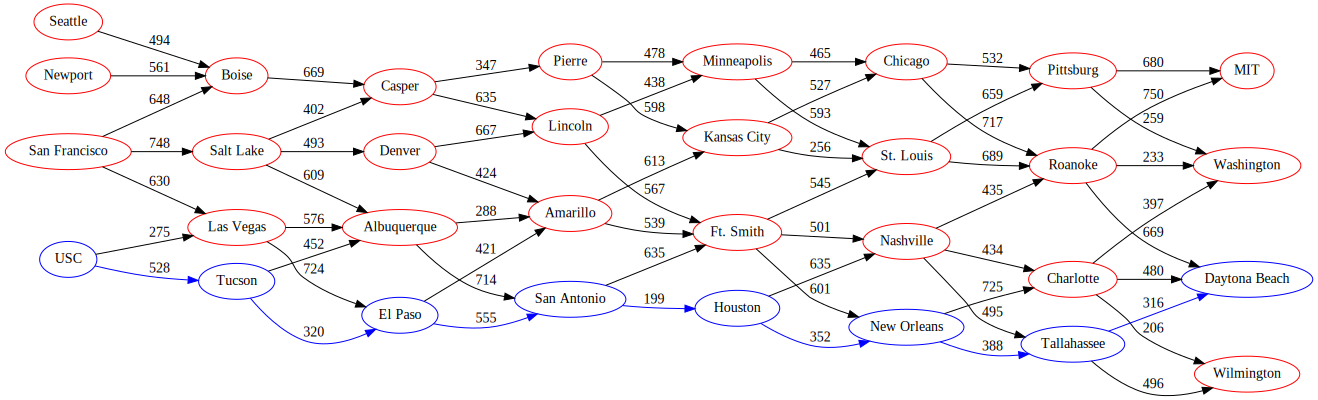

In [10]:
dot

In [8]:
graph['Seattle'] = [(494, 'Boise')]
graph['Newpoet'] = [(561, 'Boise')]
graph['San Francisco'] = [(648, 'Boise'), (748, 'Salt Lake'), (630, 'Las Vegas')]
graph['USC'] = [(275, 'Las Vegas'), (528, 'Tucson')]
graph['Boise'] = [(669, 'Casper')]
graph['Salt Lake'] = [(402, 'Casper'), (493, 'Denver'), (609, 'Albuquerque')]
graph['Las Vegas'] = [(576, 'Albuquerque'), (724, 'El Paso')]
graph['Tucson'] = [(452, 'Albuquerque'), (320, 'El Paso')]
graph['Casper'] = [(347, 'Pierre'), (635, 'Lincoln')]
graph['Denver'] = [(667, 'Lincoln'), (424, 'Amarillo')]
graph['Albuquerque'] = [(288, 'Amarillo'), (714, 'San Antonio')]
graph['El Paso'] = [(421, 'Amarillo'),  (555, 'San Antonio')]
graph['Pierre'] = [(478, 'Minneapolis'), (598, 'Kansas City')]
graph['Lincoln'] = [(438, 'Minneapolis'), (567, 'Ft. Smith')]
graph['Amarillo'] = [(613, 'Kansas City'), (539, 'Ft. Smith')]
graph['San Antonio'] = [(635, 'Ft. Smith'), (199, 'Houston')]
graph['Minneapolis'] = [(465, 'Chicago'), (593, 'St. Louis')]
graph['Kansas City'] = [(527, 'Chicago'), (256, 'St. Louis')]
graph['Ft. Smith'] = [(545, 'St. Louis'), (501, 'Nashville'), (601, 'New Orleans')]
graph['Houston'] = [(635, 'Nashville'), (352, 'New Orleans')]
graph['Chicago'] = [(532, 'Pittsburg'), (717, 'Roanoke')]
graph['St. Louis'] = [(659, 'Pittsburg'), (689, 'Roanoke')]
graph['Nashville'] = [(435, 'Roanoke'), (434, 'Charlotte'), (495, 'Tallahassee')]
graph['New Orleans'] = [(725, 'Charlotte'), (388, 'Tallahassee')]
graph['Pittsburg'] = [(680, 'MIT'), (259, 'Washington')]
graph['Roanoke'] = [(750, 'MIT'), (233, 'Washington'), (669, 'Daytona Beach')]
graph['Charlotte'] = [(397, 'Washington'), (206, 'Wilmington'), (480, 'Daytona Beach')]
graph['Tallahassee'] = [(496, 'Wilmington'), (316, 'Daytona Beach')]

In [9]:
graph[0] = [(494, 4)]
graph[1] = [(561, 4)]
graph[2] = [(648, 4), (748, 5), (630, 6)]
graph[3] = [(275, 6), (528, 7)]
graph[4] = [(669, 7)]
graph[5] = [(402, 7), (493, 8), (609, 9)]
graph[6] = [(576, 9), (724, 10)]
graph[7] = [(452, 10), (320, 11)]
graph[8] = [(347, 12), (635, 13)]
graph[9] = [(667, 13), (424, 14)]
graph[10] = [(288, 14), (714, 15)]
graph[11] = [(421, 14),  (555, 15)]
graph[12] = [(478, 16), (598, 17)]
graph[13] = [(438, 16), (567, 18)]
graph[14] = [(613, 17), (539, 18)]
graph[15] = [(635, 18), (199, 19)]
graph[16] = [(465, 20), (593, 21)]
graph[17] = [(527, 20), (256, 21)]
graph[18] = [(545, 21), (501, 22), (601, 23)]
graph[19] = [(635, 22), (352, 23)]
graph[20] = [(532, 24), (717, 25)]
graph[21] = [(659, 24), (689, 25)]
graph[22] = [(435, 25), (434, 26), (495, 27)]
graph[23] = [(725, 26), (388, 27)]
graph[24] = [(680, 29), (259, 28)]
graph[25] = [(750, 29), (233, 28), (669, 31)]
graph[26] = [(397, 28), (206, 30), (480, 31)]
graph[27] = [(496, 30), (316, 31)]